In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mediapy as media

import cv2 
%matplotlib inline


In [42]:
cam = cv2.VideoCapture("/home/bam-gpu/intelligent_machines/dataset/cup_on_desk.MOV")
frames = []

# Get video resolution
width = int(cam.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cam.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(f"Original Resolution: {width}x{height}")

scale_percent = 0.5
print(f"New Resolution: {int(width*scale_percent)}x{int(height*scale_percent)}")

# Loop through each frame and store it
while True:
    ret, frame = cam.read()
    if not ret:
        break  # Break if no frame is returned (end of video)
    
    # Downscale the frame
    frame_resized = cv2.resize(frame, (int(width*scale_percent), int(height*scale_percent)), interpolation=cv2.INTER_AREA)
    
    # Convert frame to RGB (mediapy expects RGB format)
    frame_rgb = cv2.cvtColor(frame_resized, cv2.COLOR_BGR2RGB)
    frames.append(frame_rgb)

# Release the video capture
cam.release()

Original Resolution: 1080x1920
New Resolution: 540x960


In [43]:
media.show_video(frames, width=int(width * 0.2), height=int(height * 0.2), fps=30)

In [44]:
H, W, C = frames[0].shape
print(f"Shape: {(H, W, C)}")
px = W // 2
py = H // 2
print(f"Pixel: ({py}, {px})")


obs = []

for frame in frames:
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    pixel_value = frame_gray[py, px]
    obs.append(pixel_value)

Shape: (960, 540, 3)
Pixel: (480, 270)


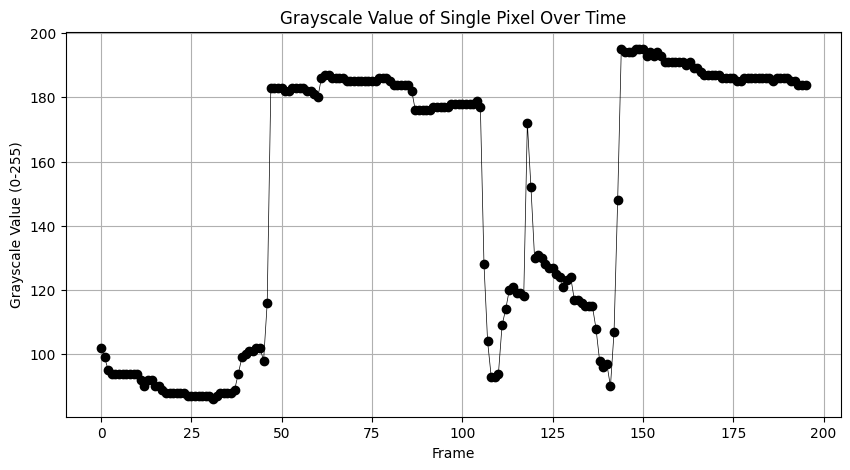

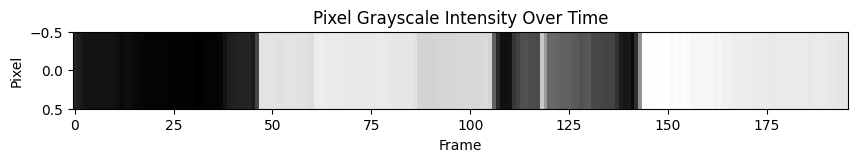

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(obs, 'o-', color='black', linewidth=0.5)
plt.title('Grayscale Value of Single Pixel Over Time')
plt.xlabel('Frame')
plt.ylabel('Grayscale Value (0-255)')
plt.grid(True)
plt.show()

grayscale_image = np.array(obs, dtype=np.uint8).reshape(1, -1)  # 1 pixel wide, N frames tall
plt.figure(figsize=(10, 1))
plt.imshow(grayscale_image, cmap='gray', aspect='auto')
plt.title('Pixel Grayscale Intensity Over Time')
plt.xlabel('Frame')
plt.ylabel('Pixel')
plt.show()

So interesting how this is different than a random walk:

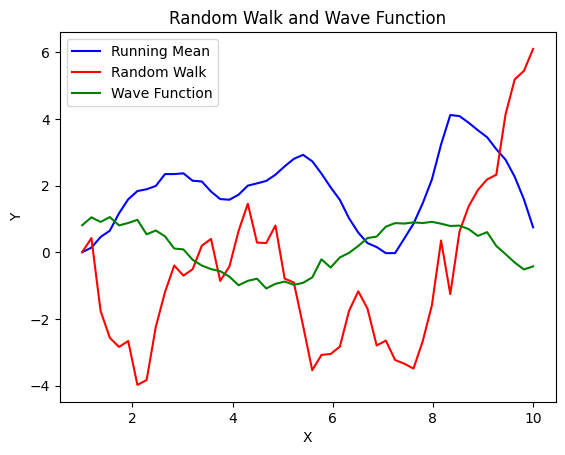

Mabye this can be used for edge detection?
- Or localising objects?
- Motion perhaps does make things easier?

Just having fast and slow weights may be enough to caputre this behavior no?

In [86]:
Ys = []
Xs = []
errors = []
s = 0
b = 0.2 # threshold 
w = 0.8 # sensativity
step = 0.1

for x in obs[:-1]:

    x /= 255

    error = x - s
    s += error * step

    y = w * abs(error) - b
    y = max(y, 0)

    # I could also write like
    # y > b then y = y else y = 0
    # to avoid offsetting randomly by b

    errors.append(error)
    Ys.append(y)
    Xs.append(x)




# Normalise? [0 to 1] or [-1 to 1] 

# 0 to 1 feels more natural here, but actually mathetical properties may not be as good



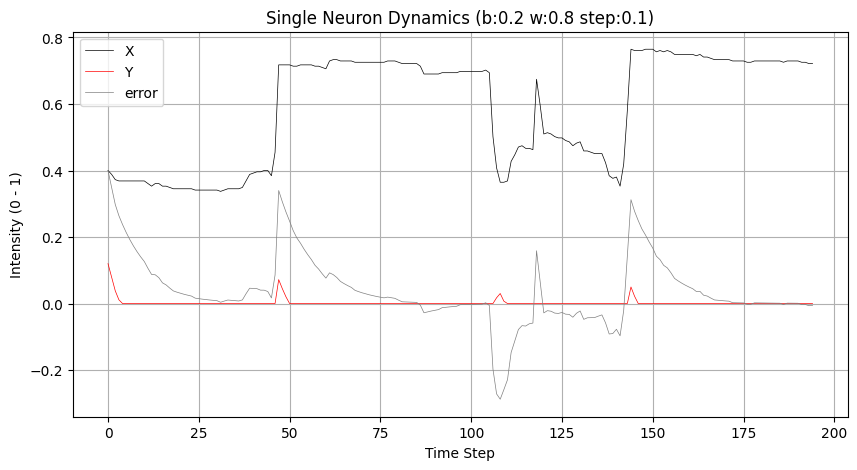

In [87]:
plt.figure(figsize=(10, 5))

plt.plot(Xs, '-', color='black', linewidth=0.5, label='X')  # 'o-' for points and line, thin line with linewidth
plt.plot(Ys, '-', color='red', linewidth=0.5, label='Y')  # 'o-' for points and line, thin line with linewidth
plt.plot(errors, '-', color='grey', linewidth=0.5, label='error')  # 'o-' for points and line, thin line with linewidth

plt.title(f'Single Neuron Dynamics (b:{b} w:{w} step:{step})')
plt.xlabel('Time Step')
plt.ylabel('Intensity (0 - 1)')
plt.grid(True)
plt.legend()
plt.show()

In [75]:
#Oscilator

Ys = []
Xs = []
differences = []
s = 0
b = 0 # threshold 
w = -1 # sensativity
step = 0
x = 1 # impluse

for i in range(100):

    diff = x - s
    s += diff * step

    y = w * diff - b
    # y = max(y, 0)

    # I could also write like
    # y > b then y = y else y = 0
    # to avoid offsetting randomly by b

    differences.append(diff)
    Ys.append(y)
    Xs.append(x)

    x = y

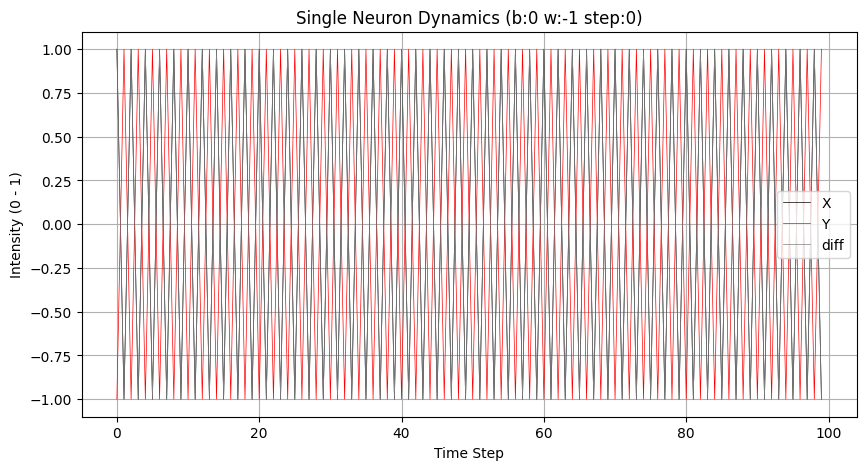

In [76]:
plt.figure(figsize=(10, 5))

plt.plot(Xs, '-', color='black', linewidth=0.5, label='X')  # 'o-' for points and line, thin line with linewidth
plt.plot(Ys, '-', color='red', linewidth=0.5, label='Y')  # 'o-' for points and line, thin line with linewidth
plt.plot(differences, '-', color='grey', linewidth=0.5, label='diff')  # 'o-' for points and line, thin line with linewidth

plt.title(f'Single Neuron Dynamics (b:{b} w:{w} step:{step})')
plt.xlabel('Time Step')
plt.ylabel('Intensity (0 - 1)')
plt.grid(True)
plt.legend()
plt.show()